In [1]:
# Execute before using this notebook if using google colab

kernel = str(get_ipython())

if 'google.colab' in kernel:    
    !wget https://raw.githubusercontent.com/fredzett/rmqa/master/utils.py -P local_modules -nc 
    !npx degit fredzett/rmqa/data data
    import sys
    sys.path.append('local_modules')

In [2]:
import numpy as np
from utils import plot_line, plot_bar, plot_hist

# Exercise 1

What is the probability when rolling three dices that the sum of eyes of those three eyes is $\geq 15$?

## Solution 1

In [ ]:
n = 10

In [32]:
np.random.randint(1,7,(n, 3))

array([[2, 4, 1],
       [4, 2, 3],
       [2, 6, 1],
       ...,
       [5, 4, 4],
       [4, 4, 1],
       [6, 5, 1]])

In [35]:
n = 100000
dices = np.random.randint(1,7,size=(n,3))
sum(np.sum(dices,axis=1) >= 15)/n

0.09191

# Exercise 2

Philip Founder has invested $200.000$ in his new business. Based on research he expects the following number of customers per period:

- customers: 10, 40, 60, 100 
- probability of arrival: 10%, 50%, 30%, 10%

Example: with a probability of 50% he expects 40 customers a day 

On average his after cost cashflow is $120$ EUR per customer. 

Assume that the business will last for 50 periods. 

What is the probability of recovering his investment after:

- 26 periods
- 30 periods
- 40 periods

(Tip: use `utils.plot_bar` or `utils.plot_hist`)


In [54]:
def simulate_earnings():
    'Simulates business for 50 periods and returns cumulative earnings per period'
    choices = [10,40,60,100]
    probs = [0.1,0.5,0.3,0.1]
    price_customer = 120

    periods = 50
    earnings = np.empty(periods)
    for i in range(periods):
        customer = np.random.choice(choices, p=probs)
        earnings[i] = customer * price_customer
    return np.cumsum(earnings)

In [72]:
np.argwhere(simulate_earnings() >= 200000)[0][0]

35

In [73]:
n = 10000
investment = 200_000
break_even = []
for i in range(n):
    break_even.append(np.argwhere(simulate_earnings() >= investment)[0][0])

In [75]:
np.mean(break_even)

33.5753

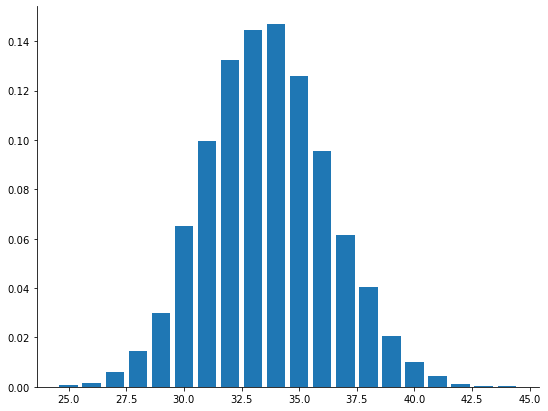

In [300]:
days, amounts = np.unique(break_even, return_counts=True)
probs = amounts / n
plot_bar(days,probs);

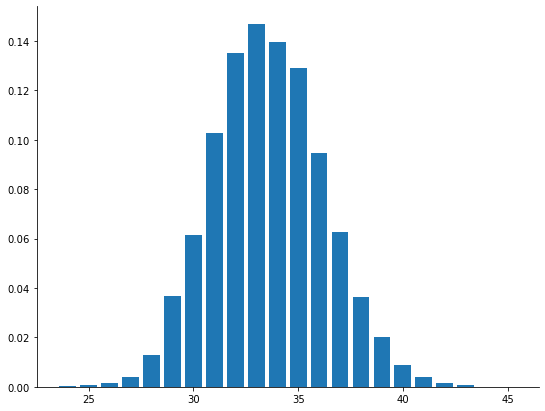

In [76]:
plot_hist(break_even, show_prob=True);

In [243]:
customers = 0.1*10+40*0.5+60*0.3+100*0.1
200000 / (customers * 120)

34.01360544217687

# Exercise 3

You play a game with your friend. The game works as follows:

- You filp a coin. Head = you win, Tail = your friend wins  
    *(assume that it is a fair coin with $50\%$ probability of head or tail)*

- The person that wins 4 flips wins the overall game

Questions:

- what is the probability that the game lasts 4 games

- what is the probability that the game lasts 5 games

- what is the probability that the game lasts 7 games

## Solution 3

In [106]:
# game lasts 4 games
n = 10000
games = np.random.randint(0,2, size=(n,4))
sums = np.sum(games, axis=1)
(sum(sums == 4) + sum(sums==0)) / n

0.1217

In [135]:
# game lasts 4, 5, or 7 games

def flip():
    return np.random.randint(0,2)

def game():
    game = {"A":0, "B":0, "stop":False}

    while game["stop"] == False:
        
        if flip() == 0:
            game["A"] += 1
        else:
            game["B"] +=1

        if (game["A"] == 4) | (game["B"]==4):
            game["stop"] = True
    
    return game


In [170]:
n = 100000
length = {4:0,5:0,6:0, 7:0}
for i in range(n):
    result = game()
    games = result["A"] + result["B"]
    length[games] += 1
    

In [172]:
length.get(4) / n, length.get(5) / n, length.get(7) / n

(0.12585, 0.24959, 0.31053)